In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
import os 
os.chdir("C:\\Users\\PC\\Downloads")

In [6]:
# We have two datasets and 
# We use all algorithms on these datasets

In [7]:
data = pd.read_csv("Wholesale customers data.csv")
df = pd.read_csv("indian_liver_patient.csv")

In [8]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Dataset 1

In [10]:
# Firstly , we start "data"
# which consists of 440 rows and 8 columns 
# In this dataset , our target column is "Channel"

In [11]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [12]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [13]:
data.Channel.unique() # they must be in the form of 0,1,...

array([2, 1], dtype=int64)

In [14]:
data['Channel'][data['Channel']==1]=0
data['Channel'][data['Channel']==2]=1

In [15]:
scale= StandardScaler()
for col in data[['Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]:
    data[col] = scale.fit_transform(data[[col]])

In [16]:
x = data.drop("Channel",axis = 1)
y = data['Channel']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=41)

In [18]:
def testRandomForest(X_test, y_test,X_train,y_train):
    params = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_leaf_nodes': [4,10,20,50,None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4, 5],
             'min_samples_split': [2, 4, 5, 10],
             'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

   
    r_forest = RandomForestClassifier()
    random_cv = RandomizedSearchCV(r_forest, params, cv=5)
    random_cv.fit(X_train,y_train)
    forest_pred = random_cv.predict(X_test)
    
    print('\n Test performance RandomForest')
    print('-------------------------------------------------------')
    print(classification_report(y_test, forest_pred))

    return accuracy_score(y_test, forest_pred)






def testSVM(X_test, y_test,X_train,y_train):
    
    param_distributions = {'C': uniform(0, 10),
                            'gamma': uniform(0, 1),
                            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                            'degree': randint(1, 10)}
    
    model = SVC()
    model_hyper = RandomizedSearchCV(model, param_distributions , cv=5)
    model_hyper.fit(X_train, y_train)
    y_test_hat = model_hyper.predict(X_test)

    print('\n Test performance SVM :')
    print('-------------------------------------------------------')
    print(classification_report(y_test, y_test_hat))

    return accuracy_score(y_test, y_test_hat)





def testXGboost(X_test, y_test,X_train,y_train):
   
    space={
           'learning_rate': [0.01,0.05,0.1],
           'booster': ['gbtree', 'gblinear'],
            'reg_alpha': [0, 0.5, 1],
            'reg_lambda' : [0.05, 0.5, 1, 5],
           'base_score': [0.2, 0.5, 1],
            'n_estimators': [100, 200, 500]
        }

    bst = XGBClassifier()
    xgb_cv = RandomizedSearchCV(bst, space, cv=5)
   
    xgb_cv.fit(X_train,y_train)
    pred = xgb_cv.predict(X_test)
    
    print('\n Test performance XGBoost :')
    print('-------------------------------------------------------')
    print(classification_report(y_test, pred))
   
    return accuracy_score(y_test, pred)





def testDecisionTree(X_test, y_test,X_train,y_train):
    params = {"max_depth": [3, None],
              'max_features': randint(1, 9),
              'min_samples_leaf': randint(1, 9),
              'max_leaf_nodes': [4,10,20,50,None]
         }

   
    tree = DecisionTreeClassifier()
    tree_cv1 = RandomizedSearchCV(tree, params, cv=5)
    tree_cv1.fit(X_train,y_train)
    y_pred = tree_cv1.predict(X_test)
    
    print('\n Test performance DecisionTree :')
    print('-------------------------------------------------------')
    print(classification_report(y_test, y_pred))

    return accuracy_score(y_test, y_pred)
   
    
    
    
    
def testLogistic(X_test, y_test,X_train,y_train):
    
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_prediction = clf.predict(X_test)
    
    print('\n Test performance Logistic : ')
    print('-------------------------------------------------------')
    print(classification_report(y_test, y_prediction))
    
    return accuracy_score(y_test, y_prediction)





def testtreeModels(X_test, y_test,X_train,y_train):
   
    diction = {"Dtree" : 0,
              "XGBoost": 0,
              "RandomF" : 0,
              "Logistic" : 0,
              "SVM" : 0}
    
    diction['Dtree'] = testDecisionTree(X_test, y_test,X_train,y_train)
    diction['XGBoost'] = testXGboost(X_test, y_test,X_train,y_train)
    diction['RandomF'] = testRandomForest(X_test, y_test,X_train,y_train)
    diction['Logistic'] = testLogistic(X_test, y_test,X_train,y_train)
    diction['SVM'] = testSVM(X_test, y_test,X_train,y_train)

    return diction

In [19]:
testtreeModels(x_test, y_test,x_train,y_train)


 Test performance DecisionTree :
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        49
           1       0.82      0.82      0.82        17

    accuracy                           0.91        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.91      0.91      0.91        66


 Test performance XGBoost :
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        49
           1       0.89      0.94      0.91        17

    accuracy                           0.95        66
   macro avg       0.93      0.95      0.94        66
weighted avg       0.96      0.95      0.95        66


 Test performance RandomForest
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98     

{'Dtree': 0.9090909090909091,
 'XGBoost': 0.9545454545454546,
 'RandomF': 0.9393939393939394,
 'Logistic': 0.9242424242424242,
 'SVM': 0.9393939393939394}

# 

# 

# Dataset 2

In [20]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [21]:
# check data types, it provides also details on null values, so next checking of null values may not be required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,583.0,NaN,NaN,NaN,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0
Gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirubin,583.0,NaN,NaN,NaN,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0
Direct_Bilirubin,583.0,NaN,NaN,NaN,1.486106,2.808498,0.1,0.2,0.3,1.3,19.7
Alkaline_Phosphotase,583.0,NaN,NaN,NaN,290.576329,242.937989,63.0,175.5,208.0,298.0,2110.0
Alamine_Aminotransferase,583.0,NaN,NaN,NaN,80.713551,182.620356,10.0,23.0,35.0,60.5,2000.0
Aspartate_Aminotransferase,583.0,NaN,NaN,NaN,109.910806,288.918529,10.0,25.0,42.0,87.0,4929.0
Total_Protiens,583.0,NaN,NaN,NaN,6.48319,1.085451,2.7,5.8,6.6,7.2,9.6
Albumin,583.0,NaN,NaN,NaN,3.141852,0.795519,0.9,2.6,3.1,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


In [23]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [24]:
# What can we see from describe & info ?
# for gender we have 2 unique values - sounds reasonable
# there seems to be extremes for several fields (compare 75% with max) - we will have to fix it
# dataset, our target variable, has 2 values
# albumin_and_globulin_ratio have some missing values those must be handled

In [25]:
df.dropna(axis=0, how='any',inplace = True)

In [26]:
# correlation with dataset - target value
df.corr()['Dataset']

Age                          -0.133164
Total_Bilirubin              -0.220218
Direct_Bilirubin             -0.246273
Alkaline_Phosphotase         -0.183363
Alamine_Aminotransferase     -0.163117
Aspartate_Aminotransferase   -0.151834
Total_Protiens                0.033614
Albumin                       0.159770
Albumin_and_Globulin_Ratio    0.163131
Dataset                       1.000000
Name: Dataset, dtype: float64

In [27]:
# full correlation table
df.corr().style.background_gradient(cmap='viridis')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Total_Bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
Direct_Bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkaline_Phosphotase,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Alamine_Aminotransferase,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Aspartate_Aminotransferase,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
Total_Protiens,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
Albumin,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000


In [28]:
# Outcome?  
# We have strong correlation between some variables:

#     direct_bilirubin & total_bilirubin
#     aspartate_aminotransferase & alamine_aminotransferase
#     total_protiens & albumin
#     albumin_and_globulin_ratio & albumin
#     We will drop some of them as features should be independent

In [29]:
# this is simply my selection (from highly correlated features, you could also use different from pairs)
df.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Albumin','Total_Protiens'], axis=1,inplace = True)

In [30]:
# Outliers & transformation
# Now check data using boxplot and distplot to see what features are skewed, 
# what is ratio of outliers, if log1p helps etc

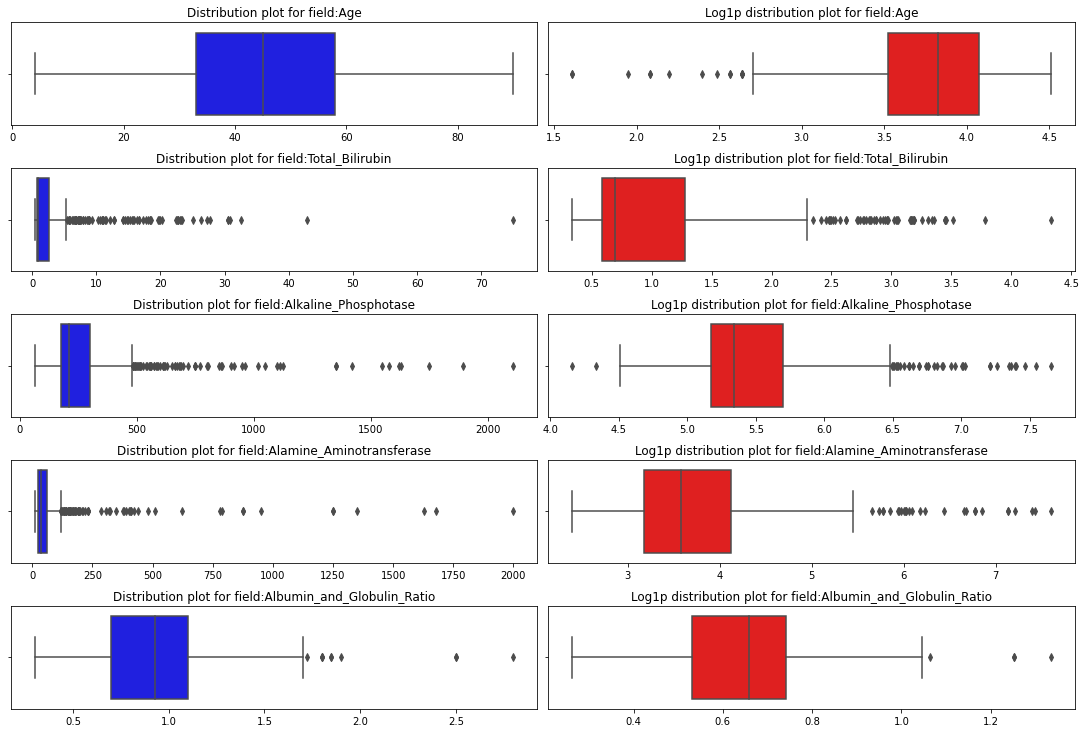

In [31]:
plt.figure(figsize=(15, 20))

for i, c in enumerate(df.drop('Dataset', axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i*2+1)
    sns.boxplot(df[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
    plt.subplot(10,2,i*2+2)
    sns.boxplot(df[c].apply('log1p'), color='red')
    plt.title('Log1p distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


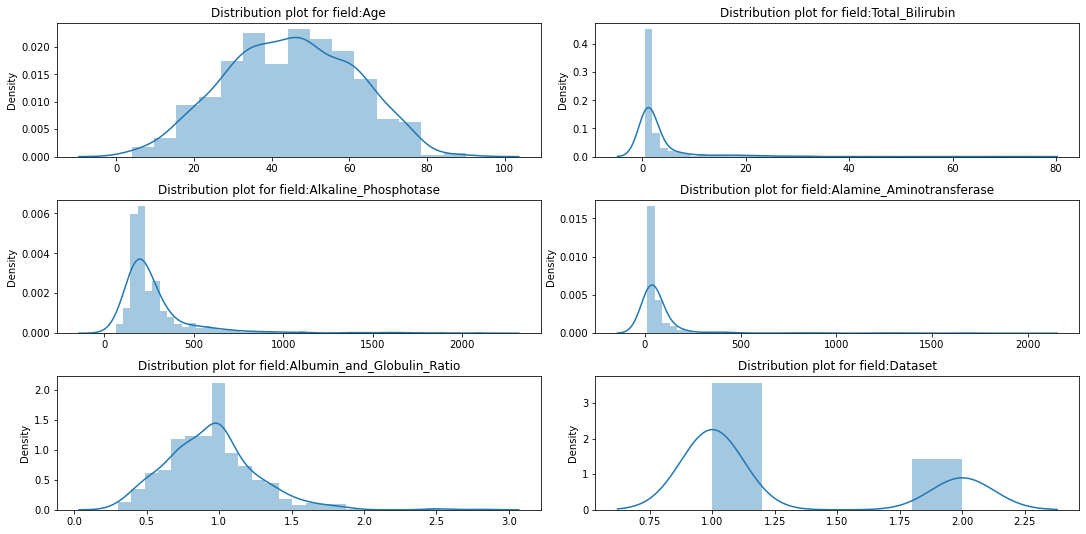

In [32]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c])
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [33]:
# What can we get out of dist plot and box plot?
# dataset is slightly imbalanced
# slightly skewed features: albumin_and_globulin_ration
# strongly skewed features: total_bilirubin, direct_bilirubin, 
#                           alkaline_phosphotase, alamine_aminotransferase, aspartate_aminotransferase
# We will fix these values using log1p transformation and then scale variables using 
# RobustScaler as this one is good for data with outliers. If you think this is not good procedure, let me know!

In [34]:
# save skewed features
skewed_cols=['Albumin_and_Globulin_Ratio','Alkaline_Phosphotase','Alamine_Aminotransferase','Total_Bilirubin']
# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    df[c] = df[c].apply('log1p')

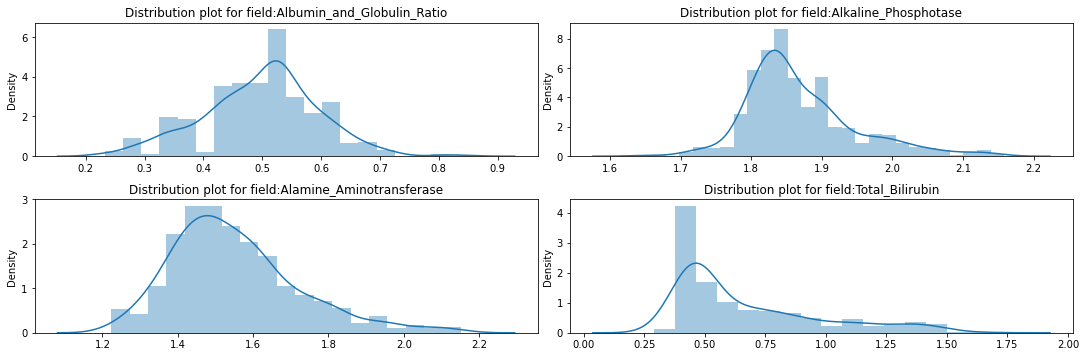

In [35]:
# Next check & fix strongly skewed features
# apply log1p transform
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [36]:
# Encode & Scale
# I will use sklearn library to encode gender and scale numerical variables

In [37]:
# gender contains string values Female, Male; these will be converted into 0, 1, as ML algorithms like just numerical values
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.Gender.head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [38]:
rs = RobustScaler()
for c in df[['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase','Albumin_and_Globulin_Ratio']].columns:
    df[c] = rs.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,0.80,0,-0.234465,-0.200886,-0.790560,-0.074138,1
1,0.68,1,2.572890,2.293084,0.622569,-0.490442,1
2,0.68,1,2.053111,1.620312,0.555648,-0.099112,1
3,0.52,1,0.000000,-0.252023,-0.922439,0.168602,1
4,1.08,1,1.292782,-0.121830,-0.264798,-1.519328,1


In [39]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [40]:
df['Dataset'][df['Dataset']==1]=0
df['Dataset'][df['Dataset']==2]=1

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Dataset', axis=1), df['Dataset'], test_size=0.25, random_state=123)

In [42]:
# Model selection
# We will use several popular models and see how they perform on our dataset. 

In [43]:
testtreeModels(X_test, Y_test, X_train, Y_train)


 Test performance DecisionTree :
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       106
           1       0.00      0.00      0.00        39

    accuracy                           0.73       145
   macro avg       0.37      0.50      0.42       145
weighted avg       0.53      0.73      0.62       145


 Test performance XGBoost :
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       106
           1       0.00      0.00      0.00        39

    accuracy                           0.73       145
   macro avg       0.37      0.50      0.42       145
weighted avg       0.53      0.73      0.62       145


 Test performance RandomForest
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76     

{'Dtree': 0.7310344827586207,
 'XGBoost': 0.7310344827586207,
 'RandomF': 0.7655172413793103,
 'Logistic': 0.7862068965517242,
 'SVM': 0.7310344827586207}

# 